In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Final_Final.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,NaN
1,Bengaluru,2015-01-02,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,22.77,NaN
2,Bengaluru,2015-01-03,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,12.03,NaN
3,Bengaluru,2015-01-04,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,17.70,NaN
4,Bengaluru,2015-01-05,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,12.72,NaN


In [3]:
data[data["City"]=="Thiruvananthapuram"]["O3"].median()

33.38

In [4]:
data[data["City"]=="Thiruvananthapuram"]["PM10"].median()

48.33

In [5]:
data[data["City"]=="Coimbatore"]["O3"].median()

23.65

In [6]:
data.loc[(data["City"]=="Ernakulam"),"O3"]=33.38

In [7]:
data.rename(columns={"PM2.5":"PM2_5"}, inplace=True)

In [8]:
import seaborn as sns

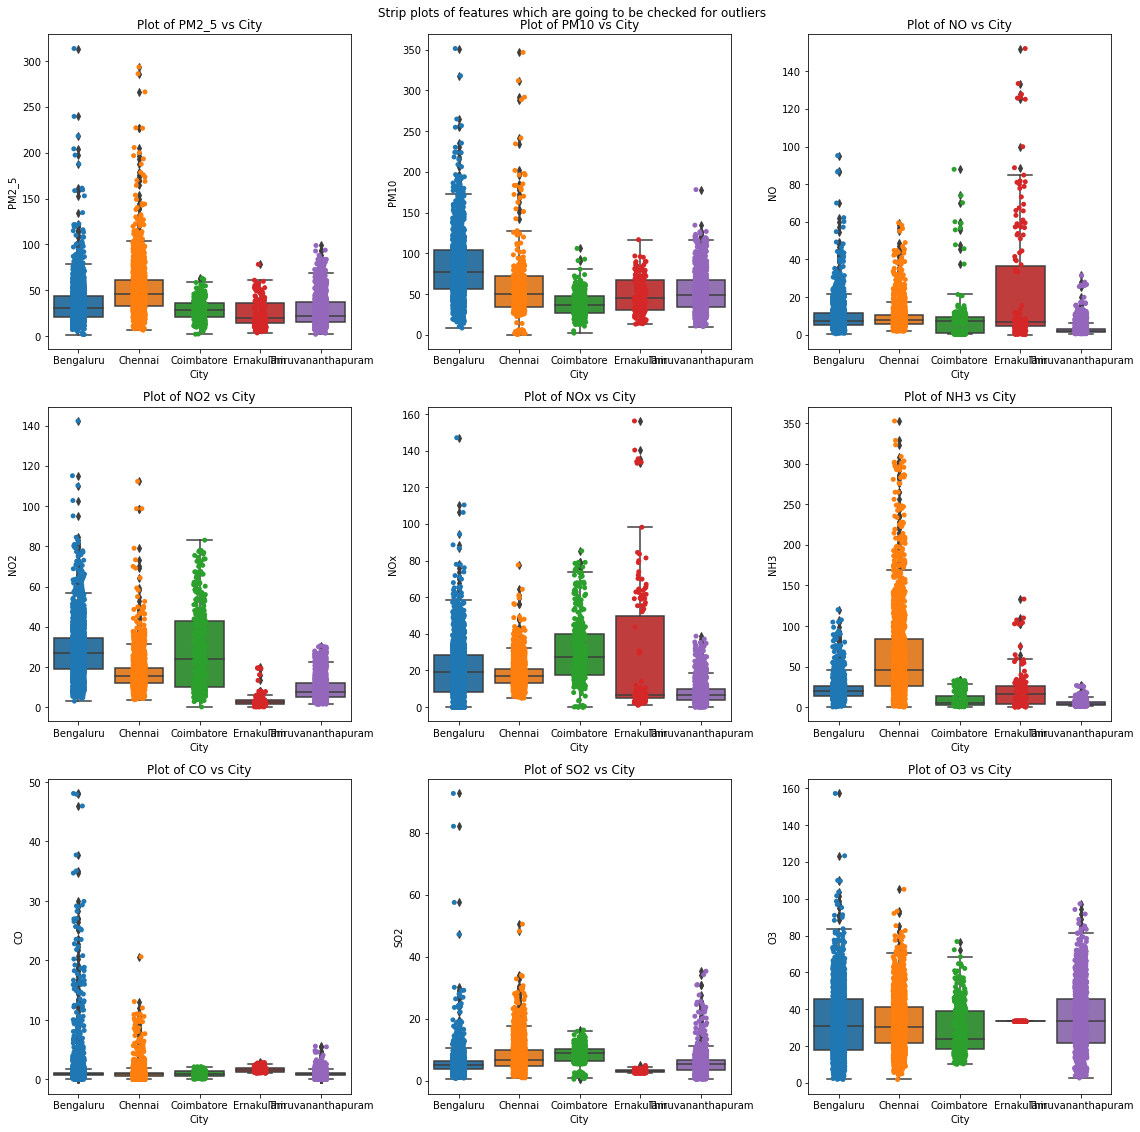

In [9]:
#fig, axes = plt.subplots(1, 3, figsize=(15, 5))
#print(fig)
fig,axes = plt.subplots(3,3, figsize=(16,16))
sns.stripplot(ax=axes[0,0],data=data,x=data['City'],y=data["PM2_5"]).set_title("Plot of PM2_5 vs City")
sns.boxplot(ax=axes[0,0],data=data,x=data['City'],y=data["PM2_5"]).set_title("Plot of PM2_5 vs City")
sns.stripplot(ax=axes[0,1],data=data,x=data['City'],y=data["PM10"]).set_title("Plot of PM10 vs City")
sns.boxplot(ax=axes[0,1],data=data,x=data['City'],y=data["PM10"]).set_title("Plot of PM10 vs City")
sns.stripplot(ax=axes[0,2],data=data,x=data['City'],y=data["NO"]).set_title("Plot of NO vs City")
sns.boxplot(ax=axes[0,2],data=data,x=data['City'],y=data["NO"]).set_title("Plot of NO vs City")
sns.stripplot(ax=axes[1,0],data=data,x=data['City'],y=data["NO2"]).set_title("Plot of NO2 vs City")
sns.boxplot(ax=axes[1,0],data=data,x=data['City'],y=data["NO2"]).set_title("Plot of NO2 vs City")
sns.stripplot(ax=axes[1,1],data=data,x=data['City'],y=data["NOx"]).set_title("Plot of NOx vs City")
sns.boxplot(ax=axes[1,1],data=data,x=data['City'],y=data["NOx"]).set_title("Plot of NOx vs City")
sns.stripplot(ax=axes[1,2],data=data,x=data['City'],y=data["NH3"]).set_title("Plot of NH3 vs City")
sns.boxplot(ax=axes[1,2],data=data,x=data['City'],y=data["NH3"]).set_title("Plot of NH3 vs City")
sns.stripplot(ax=axes[2,0],data=data,x=data['City'],y=data["CO"]).set_title("Plot of CO vs City")
sns.boxplot(ax=axes[2,0],data=data,x=data['City'],y=data["CO"]).set_title("Plot of CO vs City")
sns.stripplot(ax=axes[2,1],data=data,x=data['City'],y=data["SO2"]).set_title("Plot of SO2 vs City")
sns.boxplot(ax=axes[2,1],data=data,x=data['City'],y=data["SO2"]).set_title("Plot of SO2 vs City")
sns.stripplot(ax=axes[2,2],data=data,x=data['City'],y=data["O3"]).set_title("Plot of O3 vs City")
sns.boxplot(ax=axes[2,2],data=data,x=data['City'],y=data["O3"]).set_title("Plot of O3 vs City")
fig.suptitle("Strip plots of features which are going to be checked for outliers")
fig.tight_layout()

**Dropping the rows with nulls in the target, since the counts are nominal**

In [10]:
data[data["AQI"].isna()]["City"].value_counts()

Chennai               125
Bengaluru              99
Thiruvananthapuram     60
Coimbatore             42
Ernakulam               9
Name: City, dtype: int64

In [11]:
data.shape

(5678, 12)

In [12]:
data = data[data['AQI'].notna()]

In [13]:
data.shape

(5343, 12)

In [14]:
data1=data.copy()
data1["PM2_5"] = data["PM2_5"].fillna(data.groupby("City")["PM2_5"].transform('median'))
data1["PM10"] = data["PM10"].fillna(data.groupby("City")["PM10"].transform('median'))
data1["NO"] = data["NO"].fillna(data.groupby("City")["NO"].transform('median'))
data1["NO2"] = data["NO2"].fillna(data.groupby("City")["NO2"].transform('median'))
data1["NOx"] = data["NOx"].fillna(data.groupby("City")["NOx"].transform('median'))
data1["NH3"] = data["NH3"].fillna(data.groupby("City")["NH3"].transform('median'))
data1["CO"] = data["CO"].fillna(data.groupby("City")["CO"].transform('median'))
data1["SO2"] = data["SO2"].fillna(data.groupby("City")["SO2"].transform('median'))
data1["O3"] = data["O3"].fillna(data.groupby("City")["O3"].transform('median'))

In [15]:
Q1=np.percentile(data1['PM2_5'],25,interpolation='midpoint')
Q2=np.percentile(data1['PM2_5'],50,interpolation='midpoint')
Q3=np.percentile(data1['PM2_5'],75,interpolation='midpoint')
print("Q1=",Q1," Q2=",Q2," Q3=",Q3)

Q1= 22.275  Q2= 33.9  Q3= 49.34


In [16]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ",low_lim," Upper limit = ",up_lim)
outlier = []
for x in data1['PM2_5']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
outlier

Lower limit =  -18.322500000000012  Upper limit =  89.93750000000001


[119.16,
 91.95,
 90.07,
 134.69,
 110.05,
 98.29,
 239.54,
 121.43,
 152.94,
 115.98,
 218.17,
 101.09,
 100.39,
 97.17,
 102.01,
 91.6,
 204.25,
 120.56,
 313.59,
 97.97,
 158.67,
 114.92,
 121.63,
 122.41,
 197.41,
 93.7,
 103.18,
 90.59,
 161.35,
 107.9,
 159.52,
 187.49,
 113.31,
 108.3,
 98.84,
 94.17,
 92.21,
 149.04,
 140.21,
 266.29,
 103.75,
 106.27,
 90.72,
 100.77,
 120.24,
 91.69,
 97.96,
 97.74,
 90.87,
 125.51,
 113.78,
 119.68,
 105.59,
 100.5,
 102.97,
 127.46,
 129.49,
 100.13,
 108.88,
 111.48,
 122.16,
 90.73,
 138.07,
 107.65,
 112.72,
 127.03,
 92.83,
 98.75,
 90.02,
 100.61,
 98.47,
 123.36,
 109.5,
 96.65,
 196.81,
 92.64,
 98.0,
 132.38,
 114.08,
 91.49,
 93.71,
 101.77,
 92.41,
 91.15,
 94.8,
 293.43,
 169.75,
 144.02,
 100.68,
 91.75,
 227.17,
 286.08,
 91.14,
 131.2,
 100.14,
 112.23,
 94.7,
 92.04,
 193.3,
 226.74,
 90.46,
 94.87,
 113.21,
 164.37,
 95.58,
 100.8,
 93.32,
 168.81,
 92.17,
 111.04,
 92.89,
 112.05,
 98.92,
 98.35,
 95.16,
 96.38,
 111.83,
 1

In [17]:
len(outlier)

146

In [18]:
ind1=data1['PM2_5']>up_lim
PM2_5_outlier_indexlist=data1.loc[ind1].index
data1.shape

(5343, 12)

In [19]:
data1.drop(PM2_5_outlier_indexlist, inplace=True)
data1.shape

(5197, 12)

In [20]:
Q1=np.percentile(data1['PM10'],25,interpolation='midpoint')
Q2=np.percentile(data1['PM10'],50,interpolation='midpoint')
Q3=np.percentile(data1['PM10'],75,interpolation='midpoint')
print("Q1=",Q1," Q2=",Q2," Q3=",Q3)

Q1= 49.13  Q2= 50.245000000000005  Q3= 77.485


In [21]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ",low_lim," Upper limit = ",up_lim)
outlier = []
for x in data1['PM10']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
outlier

Lower limit =  6.597500000000004  Upper limit =  120.0175


[153.3,
 156.84,
 160.0,
 172.02,
 160.87,
 235.32,
 149.82,
 133.08,
 122.54,
 150.78,
 133.63,
 121.42,
 130.22,
 158.01,
 159.14,
 193.59,
 152.36,
 121.86,
 169.11,
 351.51,
 154.26,
 223.57,
 256.75,
 164.48,
 146.45,
 145.32,
 138.17,
 146.23,
 144.04,
 154.64,
 134.78,
 148.57,
 137.04,
 132.73,
 120.86,
 120.32,
 122.4,
 150.19,
 161.1,
 173.24,
 163.88,
 144.67,
 148.74,
 144.33,
 144.2,
 151.36,
 194.0,
 190.04,
 186.28,
 180.42,
 183.03,
 165.97,
 175.45,
 157.8,
 162.1,
 142.17,
 156.52,
 150.05,
 159.41,
 157.92,
 165.25,
 215.52,
 254.77,
 208.97,
 318.02,
 152.78,
 144.68,
 159.23,
 177.82,
 159.45,
 224.24,
 196.65,
 171.26,
 145.98,
 158.75,
 134.47,
 160.06,
 168.98,
 130.54,
 230.2,
 194.62,
 138.45,
 131.33,
 121.03,
 122.73,
 139.73,
 154.1,
 155.04,
 182.16,
 180.64,
 191.47,
 181.92,
 191.9,
 184.81,
 179.79,
 224.1,
 137.68,
 123.91,
 130.99,
 130.15,
 142.2,
 120.41,
 130.54,
 150.94,
 127.44,
 121.18,
 130.25,
 133.97,
 135.71,
 173.09,
 152.15,
 158.04,
 164.

In [22]:
print(len(outlier), flush=False)
ind1=data1['PM10']>up_lim
PM10_outlier_indexlist=data1.loc[ind1].index
data1.shape


254


(5197, 12)

In [23]:
data1.drop(PM10_outlier_indexlist, inplace=True)
data1.shape

(4956, 12)

In [24]:
ind2=data1['PM10']<6.5975
PM10_outlier_indexlist1=data1.loc[ind2].index
data1.drop(PM10_outlier_indexlist1, inplace=True)
data1.shape

(4943, 12)

In [25]:
Q1=np.percentile(data1['NO'],25,interpolation='midpoint')
Q2=np.percentile(data1['NO'],50,interpolation='midpoint')
Q3=np.percentile(data1['NO'],75,interpolation='midpoint')
print("Q1=",Q1," Q2=",Q2," Q3=",Q3)

Q1= 3.55  Q2= 6.69  Q3= 9.695


In [26]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ",low_lim," Upper limit = ",up_lim)
outlier = []
for x in data1['NO']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
outlier

Lower limit =  -5.667500000000001  Upper limit =  18.9125


[21.66,
 25.04,
 23.41,
 24.29,
 20.49,
 22.95,
 20.35,
 20.86,
 22.68,
 20.76,
 22.45,
 20.87,
 26.49,
 24.56,
 23.56,
 29.68,
 42.37,
 46.57,
 57.18,
 38.5,
 23.76,
 44.25,
 44.68,
 24.11,
 20.32,
 20.4,
 20.84,
 26.89,
 69.97,
 22.08,
 39.37,
 49.24,
 22.62,
 21.36,
 28.97,
 54.79,
 43.48,
 20.75,
 31.66,
 24.71,
 38.94,
 42.05,
 28.39,
 32.78,
 24.59,
 28.13,
 23.02,
 20.04,
 19.76,
 19.67,
 23.36,
 24.08,
 21.68,
 23.38,
 23.61,
 20.8,
 19.12,
 19.51,
 22.31,
 22.92,
 24.38,
 21.34,
 25.62,
 20.83,
 22.69,
 24.42,
 24.51,
 21.82,
 19.25,
 20.52,
 20.06,
 26.3,
 23.91,
 28.53,
 21.53,
 19.45,
 19.33,
 26.17,
 31.63,
 21.57,
 22.16,
 19.73,
 21.59,
 23.61,
 29.45,
 23.78,
 19.87,
 23.3,
 23.55,
 26.1,
 31.34,
 20.78,
 22.83,
 37.45,
 23.17,
 59.44,
 24.69,
 27.38,
 27.72,
 32.58,
 35.23,
 21.79,
 45.19,
 41.12,
 42.65,
 28.87,
 24.54,
 20.39,
 22.35,
 19.46,
 29.3,
 38.26,
 24.62,
 22.31,
 23.27,
 23.48,
 20.97,
 19.93,
 24.27,
 19.31,
 24.42,
 19.95,
 29.11,
 58.08,
 38.85,
 22.85,

In [27]:
print(len(outlier), flush=False)
ind1=data1['NO']>up_lim
NO_outlier_indexlist=data1.loc[ind1].index
data1.shape

212


(4943, 12)

In [28]:
data1.drop(NO_outlier_indexlist, inplace=True)
data1.shape

(4731, 12)

In [29]:
Q1=np.percentile(data1['NO2'],25,interpolation='midpoint')
Q2=np.percentile(data1['NO2'],50,interpolation='midpoint')
Q3=np.percentile(data1['NO2'],75,interpolation='midpoint')
print("Q1=",Q1," Q2=",Q2," Q3=",Q3)

Q1= 10.09  Q2= 15.8  Q3= 24.25


In [30]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ",low_lim," Upper limit = ",up_lim, flush=False)
outlier = []
for x in data1['NO2']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
len(outlier)

Lower limit =  -11.150000000000002  Upper limit =  45.49


132

In [31]:
ind1=data1['NO2']>up_lim
NO2_outlier_indexlist=data1.loc[ind1].index
data1.shape

(4731, 12)

In [32]:
data1.drop(NO2_outlier_indexlist, inplace=True)
data1.shape

(4599, 12)

In [33]:
Q1=np.percentile(data1['NOx'],25,interpolation='midpoint')
Q2=np.percentile(data1['NOx'],50,interpolation='midpoint')
Q3=np.percentile(data1['NOx'],75,interpolation='midpoint')
print("Q1=",Q1," Q2=",Q2," Q3=",Q3)

Q1= 7.66  Q2= 15.09  Q3= 21.605


In [34]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ",low_lim," Upper limit = ",up_lim, flush=False)
outlier = []
for x in data1['NOx']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
len(outlier)

Lower limit =  -13.2575  Upper limit =  42.5225


39

In [35]:
ind1=data1['NOx']>up_lim
NOx_outlier_indexlist=data1.loc[ind1].index
data1.shape

(4599, 12)

In [36]:
data1.drop(NOx_outlier_indexlist, inplace=True)
data1.shape

(4560, 12)

In [37]:
Q1=np.percentile(data1['NH3'],25,interpolation='midpoint')
Q2=np.percentile(data1['NH3'],50,interpolation='midpoint')
Q3=np.percentile(data1['NH3'],75,interpolation='midpoint')
print("Q1=",Q1," Q2=",Q2," Q3=",Q3)

Q1= 6.475  Q2= 20.0  Q3= 44.015


In [38]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ",low_lim," Upper limit = ",up_lim, flush=False)
outlier = []
for x in data1['NH3']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
len(outlier)

Lower limit =  -49.835  Upper limit =  100.325


278

In [39]:
ind1=data1['NH3']>up_lim
NH3_outlier_indexlist=data1.loc[ind1].index
data1.shape

(4560, 12)

In [40]:
data1.drop(NH3_outlier_indexlist, inplace=True)
data1.shape

(4282, 12)

In [41]:
Q1=np.percentile(data1['CO'],25,interpolation='midpoint')
Q2=np.percentile(data1['CO'],50,interpolation='midpoint')
Q3=np.percentile(data1['CO'],75,interpolation='midpoint')
print("Q1=",Q1," Q2=",Q2," Q3=",Q3)

Q1= 0.68  Q2= 0.89  Q3= 1.13


In [42]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ",low_lim," Upper limit = ",up_lim, flush=False)
outlier = []
for x in data1['CO']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
len(outlier)

Lower limit =  0.0050000000000002265  Upper limit =  1.8049999999999997


492

In [43]:
ind1=(data1['CO']>up_lim) | (data1['CO'] <low_lim)
CO_outlier_indexlist=data1.loc[ind1].index
data1.shape

(4282, 12)

In [44]:
data1.drop(CO_outlier_indexlist, inplace=True)
data1.shape

(3790, 12)

In [45]:
Q1=np.percentile(data1['SO2'],25,interpolation='midpoint')
Q2=np.percentile(data1['SO2'],50,interpolation='midpoint')
Q3=np.percentile(data1['SO2'],75,interpolation='midpoint')
print("Q1=",Q1," Q2=",Q2," Q3=",Q3)

Q1= 4.17  Q2= 5.655  Q3= 7.36


In [46]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ",low_lim," Upper limit = ",up_lim, flush=False)
outlier = []
for x in data1['SO2']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
len(outlier)

Lower limit =  -0.6150000000000002  Upper limit =  12.145


227

In [47]:
ind1=(data1['SO2']>up_lim) | (data1['SO2'] <low_lim)
SO2_outlier_indexlist=data1.loc[ind1].index
data1.shape

(3790, 12)

In [48]:
data1.drop(SO2_outlier_indexlist, inplace=True)
data1.shape

(3563, 12)

In [49]:
Q1=np.percentile(data1['O3'],25,interpolation='midpoint')
Q2=np.percentile(data1['O3'],50,interpolation='midpoint')
Q3=np.percentile(data1['O3'],75,interpolation='midpoint')
print("Q1=",Q1," Q2=",Q2," Q3=",Q3)

Q1= 20.515  Q2= 30.46  Q3= 42.39


In [50]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ",low_lim," Upper limit = ",up_lim, flush=False)
outlier = []
for x in data1['O3']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
len(outlier)

Lower limit =  -12.2975  Upper limit =  75.2025


29

In [51]:
ind1=(data1['O3']>up_lim) | (data1['O3'] <low_lim)
O3_outlier_indexlist=data1.loc[ind1].index
data1.shape

(3563, 12)

In [52]:
data1.drop(O3_outlier_indexlist, inplace=True)
data1.shape

(3534, 12)

In [53]:
data1.isna().sum()

City     0
Date     0
PM2_5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

<AxesSubplot:>

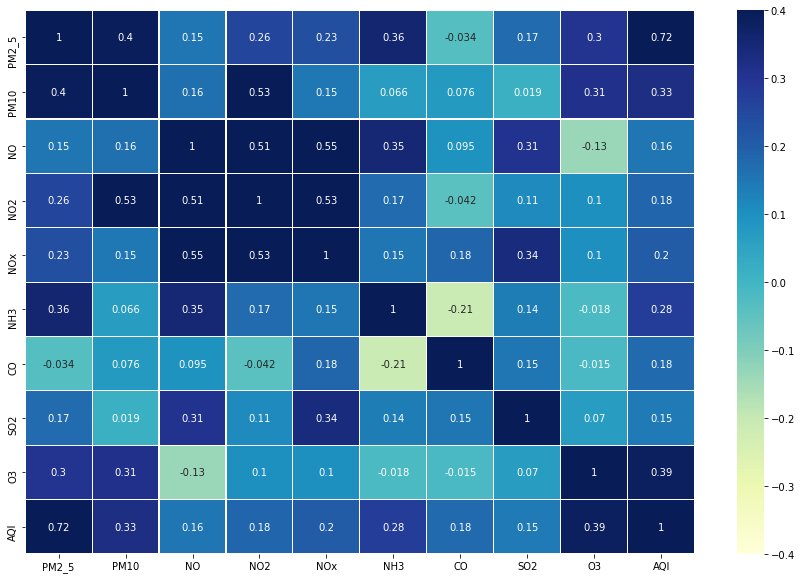

In [54]:
import seaborn as sns
corrmatrix=data1.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix, vmin=-0.4,vmax=0.4,annot=True, linewidths=0.1, cmap='YlGnBu')

In [55]:
y=data1['AQI']
X=data1.drop('AQI', axis=1)

X_temp=pd.get_dummies(X, columns=['City'])


In [56]:
X_temp.shape

(3534, 15)

In [57]:
X_temp.columns.values

array(['Date', 'PM2_5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'City_Bengaluru', 'City_Chennai', 'City_Coimbatore',
       'City_Ernakulam', 'City_Thiruvananthapuram'], dtype=object)

In [58]:
X_temp.drop(columns=['Date'], axis=1, inplace=True)

In [59]:
X=X_temp

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [61]:
from sklearn.svm import SVC
svm_radial=SVC(kernel='poly', degree=4)
svm_radial.fit(X_train,y_train)

SVC(degree=4, kernel='poly')

In [62]:
y_pred=svm_radial.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error
print('MSE is: ', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R-squared value is: ',r2_score(y_test,y_pred))

MSE is:  558.3925339366516
R-squared value is:  0.4627240097542983


In [64]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [65]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

In [66]:
arr=rfr_model(X_train,y_train)


In [67]:
arr

array([ -9.45118086, -11.13731192, -10.34920428, -11.4653565 ,
       -11.68618579,  -9.97770517, -11.05658733, -11.15213614,
       -10.57647103, -10.57682132])

In [68]:
print("Accuracy of Model with Cross Validation is:",arr.mean() * 100)

Accuracy of Model with Cross Validation is: -1074.2896035409951


In [69]:
#from sklearn.model_selection import cross_val_predict
#predictions = cross_val_predict(rfr, X_test, y, cv=10)
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [70]:
ypred=regressor.predict(X_test)

In [71]:
print('MSE is: ', mean_squared_error(y_test,ypred))
print('R-squared value is: ',r2_score(y_test,ypred))

MSE is:  351.9383540074316
R-squared value is:  0.6613707810136359


Text(3.674999999999997, 0.5, 'Count')

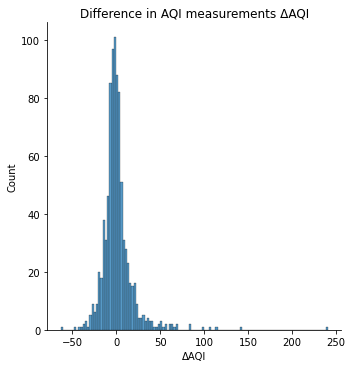

In [74]:
sns.displot(y_test-ypred)
plt.title("Difference in AQI measurements \u0394AQI")
plt.xlabel("\u0394AQI")
plt.ylabel("Count") 

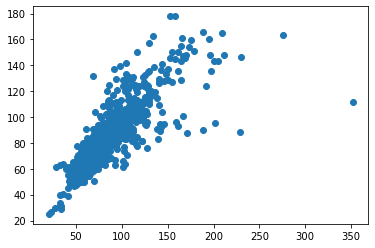

In [75]:
plt.scatter(y_test,ypred)

**Since the model created is not specifically a predictive type of modelling, this should be considered only as an inferential model. The very general observations are**
1. Bangalore and Chennai are high in concentration of PM10 and PM2.5
2. CO and triple-Oxygen are high in Bangalore
3. NH3 is high in Chennai
4. NO is high in Ernakulam

**Concerning the modelling, it should be considered as an exercise to find the accuracy of the comparison AQI that was obtained by a) the formula used in the source data to b)the machine learning method. However, since the accuracy values are not high, it cannot be applied suitably as a predictive model.**